In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/workspaces/EDA_4/data/processed/conditions_per_state.csv")
df.head()

,STATE_NAME,Physicians/10000,Primary Care Physicians/10000,Patient Care Primary Care Physicians/10000,General Surgeons/10000,Patient Care General Surgeons/10000,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Heart disease_prevalence
0,Alabama,217.1,77.2,71.2,7.6,6.9,43479.820896,23.861194,53.026866,38.273134,10.679104,16.232836,3.858209,9.616418
1,Alaska,276.9,112.8,105.6,9.6,8.5,64079.000000,17.985185,42.403704,32.048148,8.188889,11.970370,3.181481,7.448148
2,Arizona,242.0,78.1,73.2,6.9,6.1,49105.866667,26.046667,45.293333,32.160000,8.940000,13.040000,3.973333,9.000000
3,Arkansas,207.6,79.9,75.0,7.0,6.5,41801.373333,25.332000,50.680000,36.868000,10.697333,14.882667,3.789333,10.230667
4,California,279.6,96.2,87.1,7.2,6.2,67098.655172,23.184483,38.218966,27.813793,6.922414,11.325862,3.246552,6.901724


In [3]:
df.describe()

,Physicians/10000,Primary Care Physicians/10000,Patient Care Primary Care Physicians/10000,General Surgeons/10000,Patient Care General Surgeons/10000,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Heart disease_prevalence
count,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,282.386275,96.25098,86.760784,8.433333,7.345098,56443.872578,24.697500,44.583153,33.285587,8.558842,12.423432,3.354261,8.204475
std,97.435887,26.09765,19.151492,2.867380,1.789672,10266.643889,2.434465,5.453419,3.976526,1.816070,1.930684,0.337174,1.230267
min,191.300000,65.30000,61.200000,5.600000,5.000000,39932.719512,16.800000,32.000000,24.640000,4.900000,8.100000,2.600000,4.100000
25%,230.150000,80.20000,75.400000,7.000000,6.200000,48898.753333,23.502559,40.771543,31.246429,7.379060,11.189122,3.153101,7.422925
50%,263.400000,91.50000,83.700000,7.700000,6.900000,55861.895522,24.933333,45.200000,33.529167,8.286667,12.300000,3.320000,8.175000
75%,303.050000,102.85000,92.700000,9.500000,8.050000,60857.734820,26.046061,47.926481,36.248925,9.913853,13.873764,3.591258,8.902941
max,847.000000,239.70000,179.400000,25.300000,15.200000,82533.000000,28.544444,55.930909,40.997561,13.781818,16.304878,4.009091,11.181818


In [4]:
df.drop('STATE_NAME', axis= 1, inplace= True)
df.head()

,Physicians/10000,Primary Care Physicians/10000,Patient Care Primary Care Physicians/10000,General Surgeons/10000,Patient Care General Surgeons/10000,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Heart disease_prevalence
0,217.1,77.2,71.2,7.6,6.9,43479.820896,23.861194,53.026866,38.273134,10.679104,16.232836,3.858209,9.616418
1,276.9,112.8,105.6,9.6,8.5,64079.000000,17.985185,42.403704,32.048148,8.188889,11.970370,3.181481,7.448148
2,242.0,78.1,73.2,6.9,6.1,49105.866667,26.046667,45.293333,32.160000,8.940000,13.040000,3.973333,9.000000
3,207.6,79.9,75.0,7.0,6.5,41801.373333,25.332000,50.680000,36.868000,10.697333,14.882667,3.789333,10.230667
4,279.6,96.2,87.1,7.2,6.2,67098.655172,23.184483,38.218966,27.813793,6.922414,11.325862,3.246552,6.901724


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_8899/2752870595.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


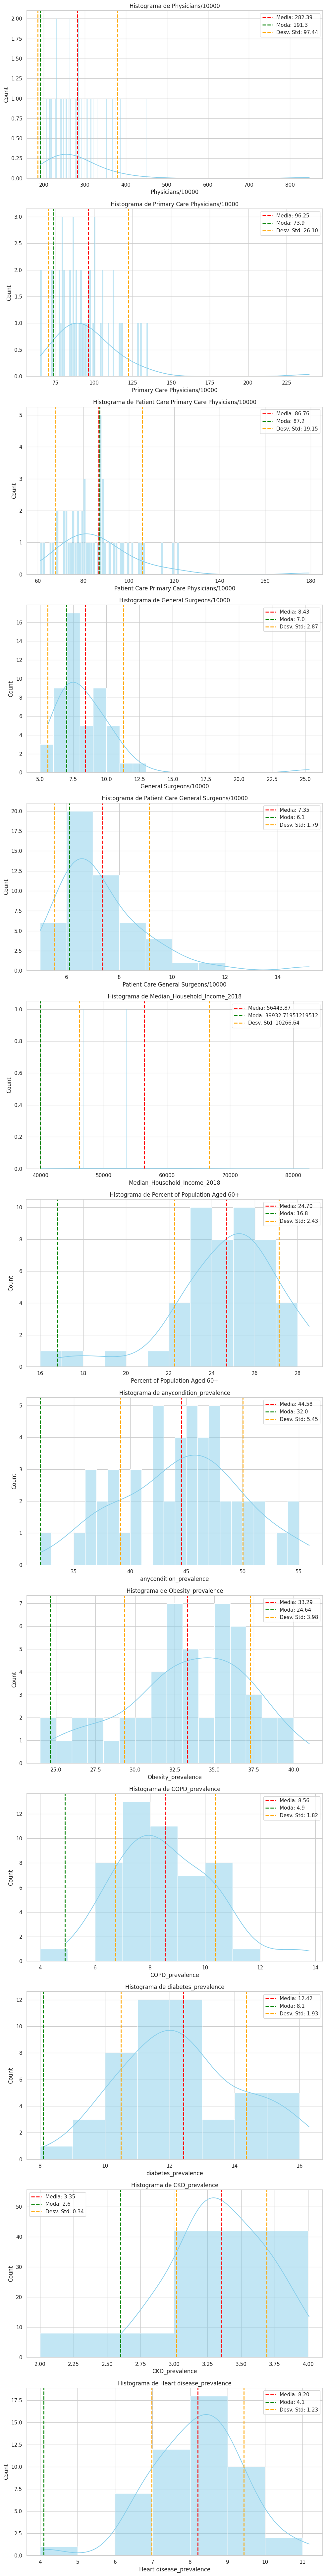

In [6]:
# Lista de nombres de columnas
columnas = df.columns

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear subgráficos para cada columna
fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 6 * len(columnas)))

# Iterar sobre cada columna
for i, col in enumerate(columnas):
    # Calcular la media, moda y desviación estándar
    media = df[col].mean()
    moda = df[col].mode() # Puede haber múltiples modas, tomamos la primera
    desviacion = df[col].std()

    # Convertir los valores de los bins a enteros
    bins = range(int(min(df[col])), int(max(df[col])) + 1)

    # Graficar el histograma
    sns.histplot(df[col], bins=bins, kde=True, color='skyblue', ax=axes[i])

    # Línea vertical para la media
    axes[i].axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')

    # Línea vertical para la moda
    axes[i].axvline(moda.iloc[0], color='green', linestyle='dashed', linewidth=2, label=f'Moda: {moda.iloc[0]}')

    # Líneas verticales para la desviación estándar
    axes[i].axvline(media + desviacion, color='orange', linestyle='dashed', linewidth=2, label=f'Desv. Std: {desviacion:.2f}')
    axes[i].axvline(media - desviacion, color='orange', linestyle='dashed', linewidth=2)

    axes[i].legend()
    axes[i].set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()